In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [59]:
df = pd.read_csv('2023_WR_Fantasy_Data.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     125 non-null    float64
 1   Player                   125 non-null    object 
 2   Receptions               125 non-null    float64
 3   Targets                  125 non-null    float64
 4   Yards                    125 non-null    float64
 5   Yards Per Reception      125 non-null    float64
 6   Long                     125 non-null    float64
 7   20+                      125 non-null    float64
 8   Touchdowns               125 non-null    float64
 9   Rushing Attempts         125 non-null    float64
 10  Rushing Yards            125 non-null    float64
 11  Rushing Touchdowns       125 non-null    float64
 12  Fumbles Lost             125 non-null    float64
 13  Games                    125 non-null    float64
 14  Fantasy Points           1

,Rank,Receptions,Targets,Yards,Yards Per Reception,Long,20+,Touchdowns,Rushing Attempts,Rushing Yards,Rushing Touchdowns,Fumbles Lost,Games,Fantasy Points,Fantasy Points Per Game,Rostered
count,125.000000,125.00000,125.000000,125.00000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000
mean,63.000000,48.15200,75.640000,621.08800,12.929600,50.040000,15.28000,3.664000,2.832000,16.624000,0.176000,0.384000,14.912000,134.87200,9.240000,0.368000
std,36.228442,28.88047,42.376652,387.43091,2.581323,16.986427,11.46425,2.951063,5.112818,34.492324,0.596549,0.632251,2.762117,82.07569,5.117018,0.484202
min,1.000000,11.00000,16.000000,116.00000,6.300000,16.000000,0.00000,0.000000,0.000000,-12.000000,0.000000,0.000000,3.000000,39.00000,2.000000,0.000000
25%,32.000000,24.00000,40.000000,311.00000,11.100000,37.000000,6.00000,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,63.00000,5.000000,0.000000
50%,63.000000,39.00000,66.000000,525.00000,12.700000,47.000000,12.00000,3.000000,1.000000,0.000000,0.000000,0.000000,16.000000,108.00000,8.000000,0.000000
75%,94.000000,68.00000,104.000000,892.00000,14.900000,62.000000,21.00000,5.000000,4.000000,21.000000,0.000000,1.000000,17.000000,202.00000,13.000000,1.000000
max,125.000000,135.00000,181.000000,1799.00000,20.500000,92.000000,57.00000,13.000000,37.000000,225.000000,5.000000,3.000000,17.000000,403.00000,24.000000,1.000000


In [60]:
# Use 'Targets' as the feature and 'Fantasy Points' as the target
X = df[['Targets']].astype(float)
y = df[['Fantasy Points']].astype(float)

# Impute missing values with the mean for both X and y
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = imputer.fit_transform(y)

# Flatten y to make it a 1D array
y = y.ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R-squared: {r2}")

Linear Regression Mean Squared Error: 435.63364083583076
Linear Regression R-squared: 0.8677848258116951


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1342.
Date:                Sat, 18 May 2024   Prob (F-statistic):           1.58e-78
Time:                        15:06:48   Log-Likelihood:                -708.87
No. Observations:                 158   AIC:                             1422.
Df Residuals:                     156   BIC:                             1428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6784      4.301     -1.785      0.0

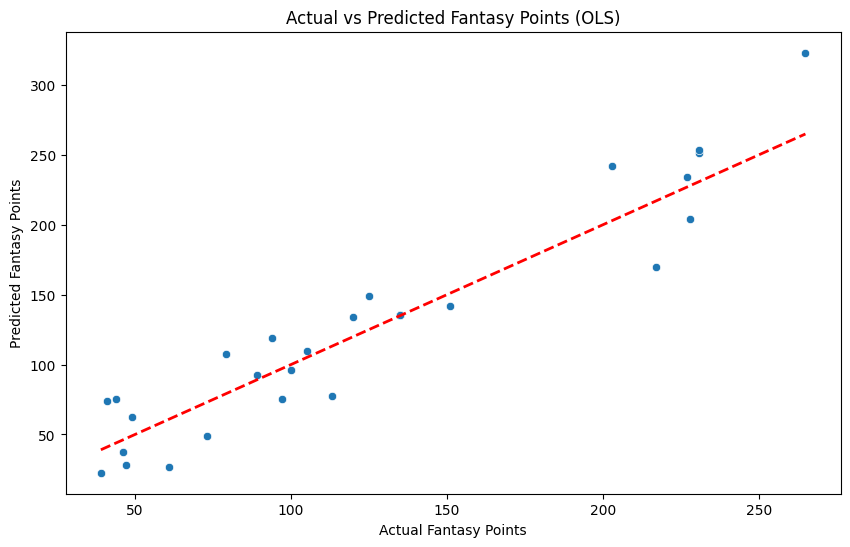

In [62]:
# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Make predictions using the OLS model
y_pred_ols = ols_model.predict(X_test_sm)

# Print the summary of the OLS model
print(ols_model.summary())

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ols)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Actual Fantasy Points')
plt.ylabel('Predicted Fantasy Points')
plt.title('Actual vs Predicted Fantasy Points (OLS)')
plt.show()



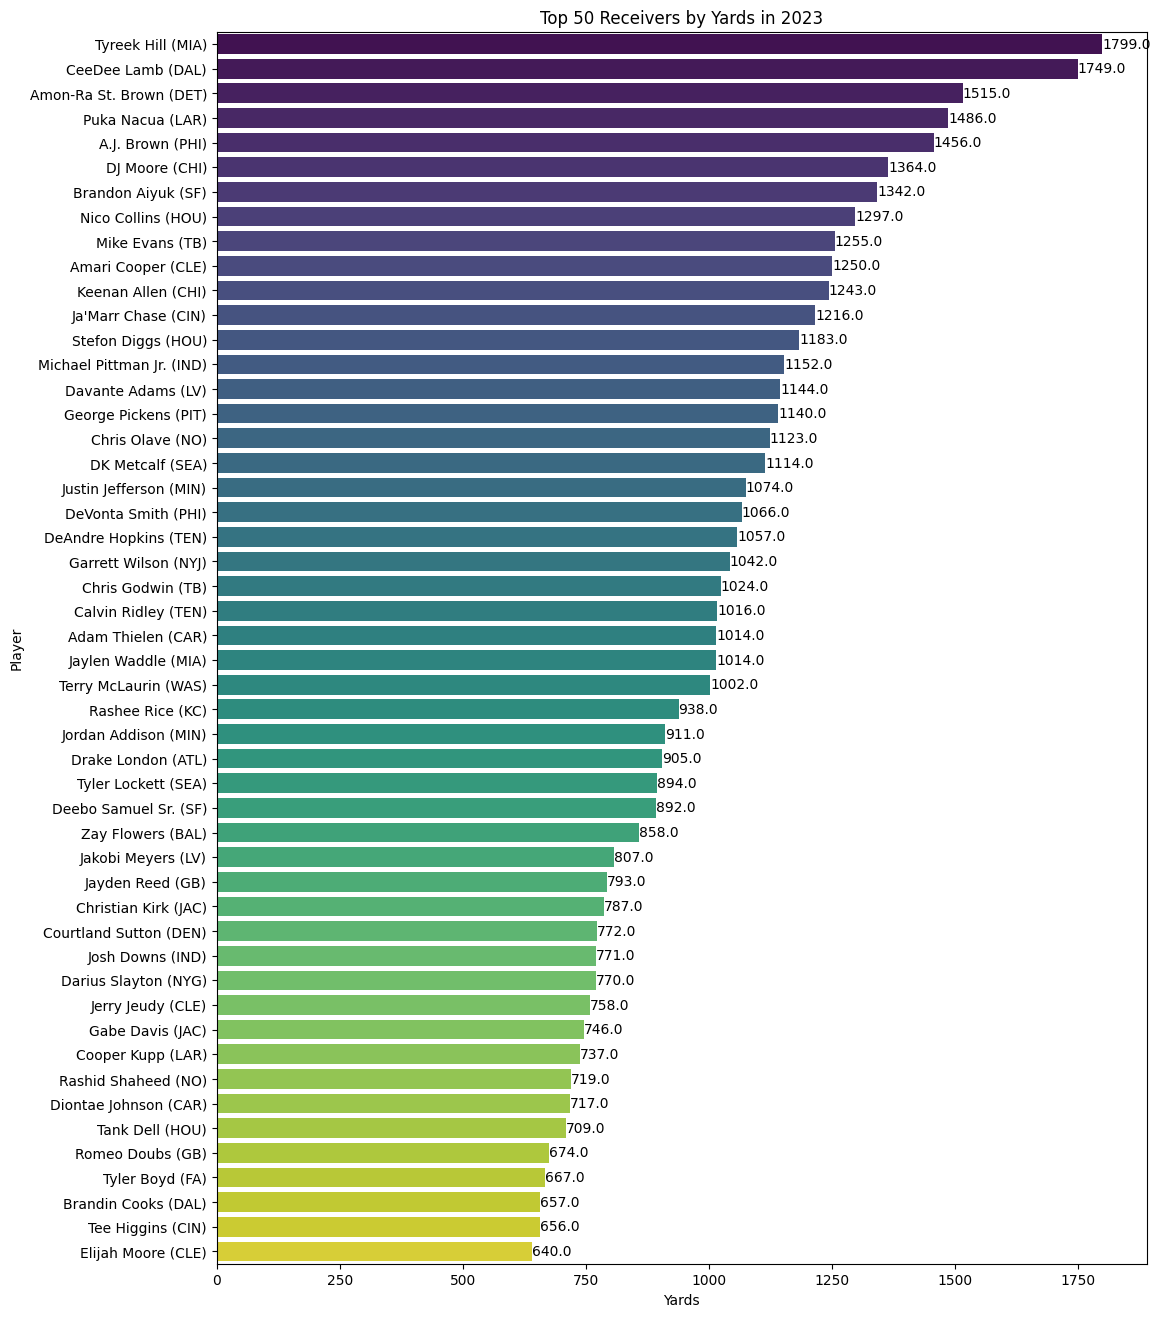

In [63]:
# Filter the top 50 receivers by Yards
top_50_receivers = df.nlargest(50, 'Yards')

# Create a horizontal bar chart
plt.figure(figsize=(12, 16))
barplot = sns.barplot(x='Yards', y='Player', data=top_50_receivers, palette='viridis')

# Add totals to the end of bars
for index, value in enumerate(top_50_receivers['Yards']):
    plt.text(value, index, f'{value}', va='center')

plt.xlabel('Yards')
plt.ylabel('Player')
plt.title('Top 50 Receivers by Yards in 2023')
plt.show()

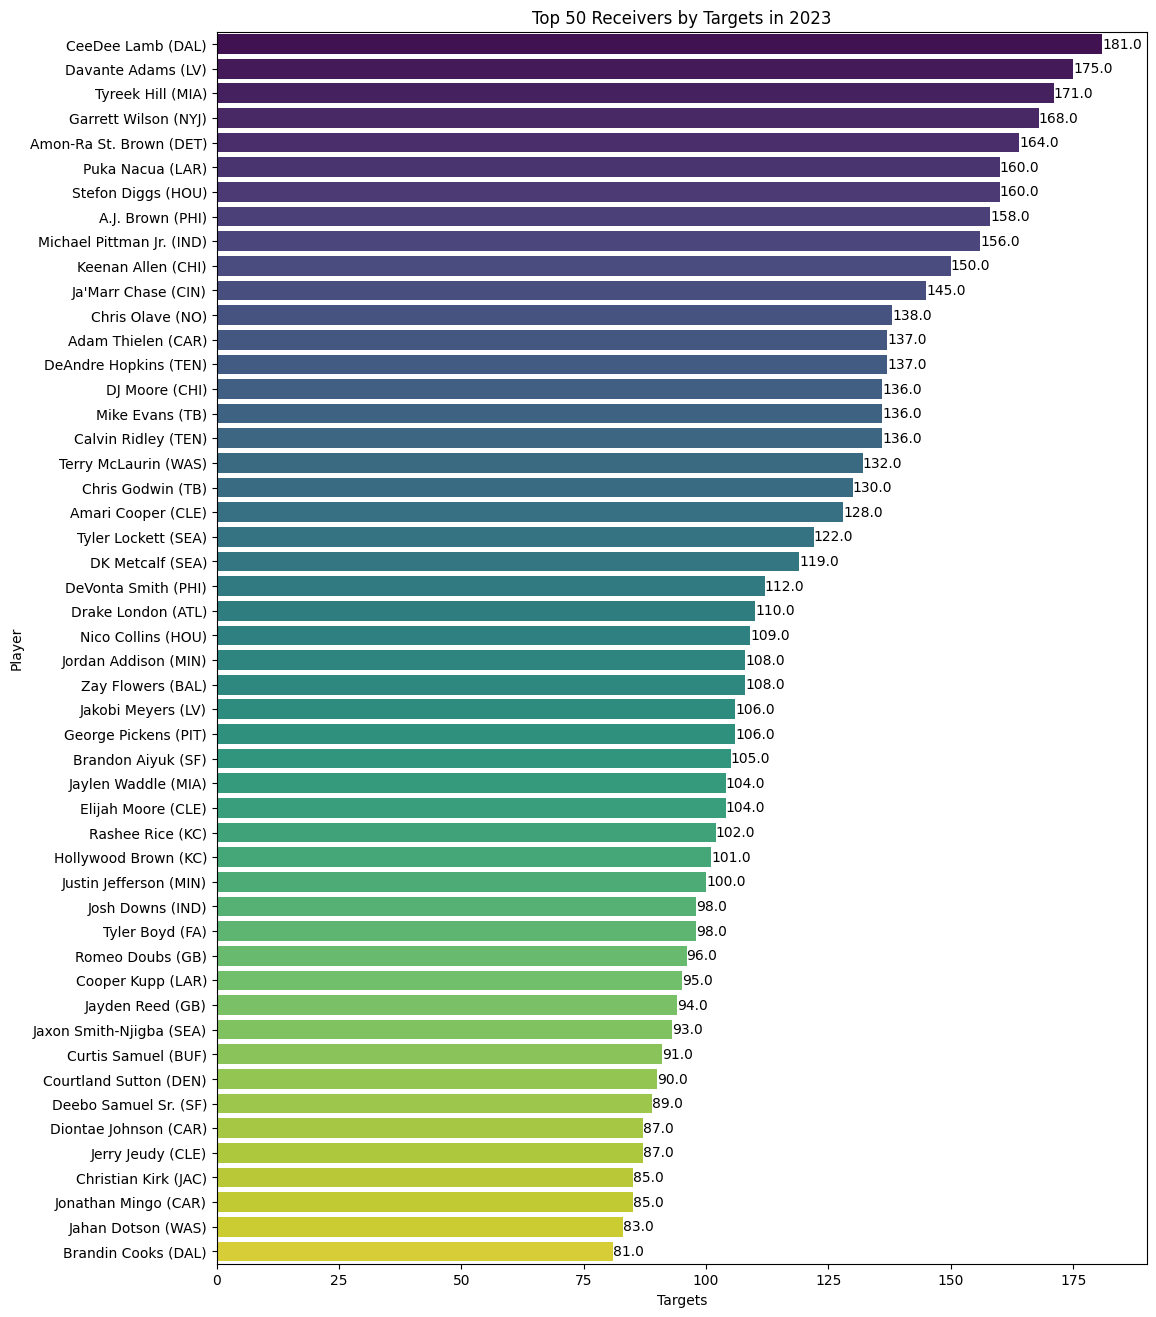

In [64]:
# Filter the top 50 receivers by Targets
top_50_receivers_targets = df.nlargest(50, 'Targets')

# Create a horizontal bar chart
plt.figure(figsize=(12, 16))
barplot = sns.barplot(x='Targets', y='Player', data=top_50_receivers_targets, palette='viridis')

# Add totals to the end of bars
for index, value in enumerate(top_50_receivers_targets['Targets']):
    plt.text(value, index, f'{value}', va='center')

plt.xlabel('Targets')
plt.ylabel('Player')
plt.title('Top 50 Receivers by Targets in 2023')
plt.show()


In [65]:
# Select features for clustering
features = ['Receptions', 'Targets', 'Yards', 'Touchdowns']  # Example features
X = df[features]

# Handle any missing values
X = X.fillna(0)


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the K-Means model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_


# Create an interactive scatter plot
fig = px.scatter(
    df, 
    x='Targets', 
    y='Fantasy Points', 
    color='Cluster', 
    hover_name='Player', 
    title='K-Means Clustering of Receivers'
)

# Show the plot
fig.show()

c:\Users\wootb\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

